## DB SCAN & Clustering
https://teddylee777.github.io/scikit-learn/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81 참조

In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np

from konlpy.tag import Okt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA

### Data load

In [2]:
review_data = pd.read_csv("./foo_UTF8.csv", encoding='utf-8')

# cluster_set = review_data['리뷰'].decode('utf-8')

cluster_set = review_data['리뷰']

cluster_set.head()

0    제발 리뷰 솔직하게 씁시다~ 닭인지 병아리인지 모르겠고 본점이라면서 짱깨 집도 같이...
1    맛은 있는데 치킨이 진짜 너무 짜게 식어서 옴...... 먹는데 이거 항의할까 말까...
2    불고기버거 단품 2개와 한우버거 세트를 주문했는데 콜라와 포테이토가 빠진 단품 3개...
3                                      말도 없이 배달 엄청 늦어짐
4    순두부찌개는 너무 짠맛만 나고.. 물 넣어서 전자레인지 돌려먹었어요 그냥 딱 쉰 김...
Name: 리뷰, dtype: object

### Review String Vectorize

In [3]:
# okt = Okt()

# for i in tqdm(review_data['리뷰']):
# print(okt.morphs(i))

vectorizer = CountVectorizer(analyzer = 'word')

vector_data = vectorizer.fit_transform(cluster_set)

print(vector_data.shape)

(10657, 23355)


In [4]:
vectorizer.get_feature_names()

['03분에',
 '09분',
 '0개가',
 '0번',
 '0점',
 '0칼로리',
 '10',
 '100',
 '1000',
 '10000',
 '1000원',
 '1000원만',
 '1000프로',
 '100g이',
 '100개',
 '100미터',
 '100분',
 '100원일지언정',
 '100이',
 '100점',
 '100퍼',
 '10400이란',
 '10개',
 '10개씩',
 '10글자',
 '10년',
 '10년째',
 '10대',
 '10만',
 '10발자국인데',
 '10배는',
 '10번',
 '10번가량',
 '10번도',
 '10번은',
 '10번을',
 '10분',
 '10분만',
 '10분씩',
 '10분에',
 '10분이',
 '10분이면',
 '10분째',
 '10시',
 '10여',
 '10장',
 '10장모았어요ㅋㅋ',
 '10장은',
 '10점',
 '10조각',
 '11',
 '11000원',
 '113분',
 '11900',
 '11분',
 '11분에',
 '11시',
 '11시쯤에',
 '11월',
 '12',
 '12000원이면',
 '1200원꼴인데',
 '1200이',
 '120점일',
 '1215로',
 '12번',
 '12분',
 '12분이',
 '12분이었는데',
 '12시',
 '12시가',
 '12시도',
 '12월',
 '12조각',
 '12주문',
 '13000원이면',
 '13000원인데',
 '13838477237477474288ㄱ84833883',
 '13900',
 '13분',
 '13분에',
 '13시',
 '13일',
 '14000원',
 '14000원어치',
 '14000짜리',
 '14300원',
 '14분',
 '14분에',
 '14살이고요',
 '15000원',
 '15000원씩',
 '15000원에',
 '1500원',
 '1500원인데',
 '1500원짜리',
 '150원도',
 '15만',
 '15분',
 '15분도',
 '15분에',
 '15분이',
 '15분쯤이었음',


In [5]:
vector_df = pd.DataFrame(vector_data.toarray())
vector_df.colums = vectorizer.get_feature_names()

vector_df.head()

D:\ProgramFile\Anaconda3\envs\Konlpy_Env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,1,2,3,4,5,6,7,8,9,...,23345,23346,23347,23348,23349,23350,23351,23352,23353,23354
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pca = PCA(n_components=5)
vector_df_dimensionality_reduction = pca.fit_transform(vector_df)
print(vector_df)

# 다차원 클러스터링을 위한 데이터프레임 2차원화 생략...하고싶다

              0         1         2         3         4
0     -0.193979 -0.086652 -0.182859 -0.086447 -0.112374
1      1.127945 -0.255731 -0.586505  0.765209 -0.410732
2     -0.139646 -0.055141 -0.323339  0.076295  0.058567
3     -0.203465 -0.096164 -0.276089 -0.026333  0.320008
4      2.948290  0.405724 -0.465049 -0.319190 -0.248480
...         ...       ...       ...       ...       ...
10652 -0.140374 -0.125869 -0.203888  0.219066 -0.225216
10653 -0.142384 -0.125422 -0.354809 -0.016388 -0.226100
10654 -0.117544 -0.095999 -0.288442  0.022826 -0.124132
10655 -0.198765 -0.094683 -0.162575 -0.185081 -0.099436
10656  0.733287 -0.120472 -0.244371 -0.396159 -0.071023

[10657 rows x 5 columns]


In [19]:
vector_df = pd.DataFrame(vector_df_dimensionality_reduction)

print(vector_df.head())

          0         1         2         3         4
0 -0.193979 -0.086652 -0.182859 -0.086447 -0.112374
1  1.127945 -0.255731 -0.586505  0.765209 -0.410732
2 -0.139646 -0.055141 -0.323339  0.076295  0.058567
3 -0.203465 -0.096164 -0.276089 -0.026333  0.320008
4  2.948290  0.405724 -0.465049 -0.319190 -0.248480


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  4.49it/s]


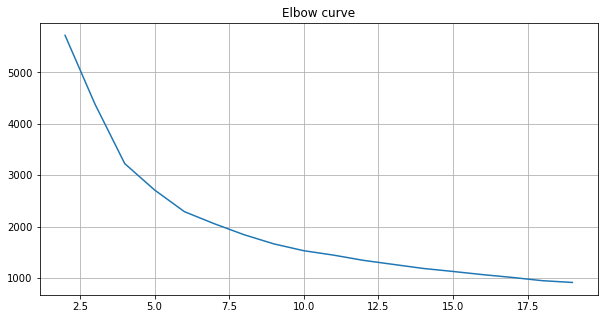

In [20]:
distortions = []
for k in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vector_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

### CLUSTERING

In [21]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters).fit(vector_df)

#result_by_sklearn = X.copy()
# result_by_sklearn["cluster"] = kmeans.labels_
#result_by_sklean.head()

labels = kmeans.labels_
centers = kmeans.cluster_centers_

review_data['ClusterLabels'] = labels
# review_data['Centers'] = centers

In [23]:
review_data.head()

review_data.to_csv('./Kmeans_clustering_result_3.csv', sep=',', na_rep='NaN')

### Cluster visualization

In [1]:
import seaborn as sns
